In [34]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [35]:
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = nn.MSELoss()
        return fn(y_hat, y)
        
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

1. **How would you need to change the learning rate if you replace the aggregate loss over the minibatch
   with an average over the loss on the minibatch?**

Since LOSS_SUM = N * LOSS_AVERAGE, the gradient is magnified N times. We need to scale down the learning rate to its 1/N. Let's implement it by code. We first use the average loss, and the learning rate is 0.03:

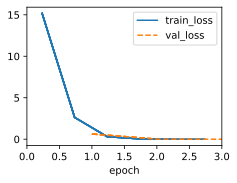

In [36]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

Then we use the sum loss by setting the parameter `reduction` in nn.MSELoss(). If we use the same learning rate(0.03), the result is:

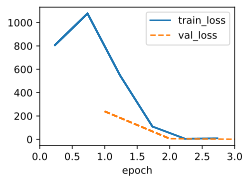

In [37]:
class LinearRegression1(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = nn.MSELoss(reduction='sum')
        return fn(y_hat, y)
        
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

model = LinearRegression1(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

We can see that the train loss is larger and decrease faster. If we change the learning rate to 0.03 / 32 = 0.0009, the result becomes normal.

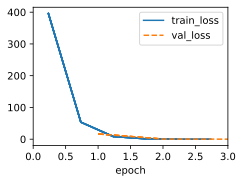

In [38]:
class LinearRegression2(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = nn.MSELoss(reduction='sum')
        return fn(y_hat, y)
        
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

model = LinearRegression2(lr=0.0009)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

2. **Review the framework documentation to see which loss functions are provided. In particular,
   replace the squared loss with Huber's robust loss function. That is, use the loss function
   $$l(y,y') = \begin{cases}|y-y'| -\frac{\sigma}{2} & \textrm{ if } |y-y'| > \sigma \\ \frac{1}{2 \sigma} (y-y')^2 & \textrm{ otherwise}\end{cases}$$**

Pytorch provides many loss functions, such as mean absolute error loss, mean squared loss, cross entropy loss. See the link [here](https://pytorch.org/docs/stable/nn.html#loss-functions). The function needs to be iterated more times to converge.

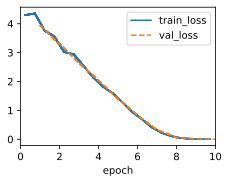

In [39]:
class LinearRegression3(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)
        
    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = nn.HuberLoss()
        return fn(y_hat, y)
        
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

model = LinearRegression3(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

3. **How do you access the gradient of the weights of the model?**

(tensor([[-0.0155,  0.0280]]), tensor([-0.0315]))

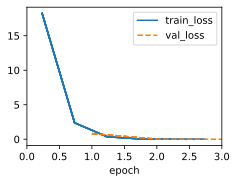

In [40]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)
model.net.weight.grad,model.net.bias.grad

4. **What is the effect on the solution if you change the learning rate and the number of epochs? Does it keep on improving?**

Change the learning rate: (1)lr=0.03

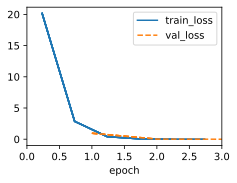

In [41]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

(2) lr=0.3:

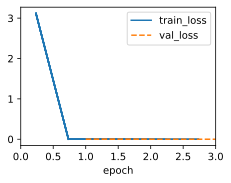

In [42]:
model = LinearRegression(lr=0.3)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

(3) lr=1:

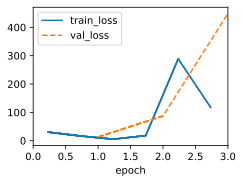

In [43]:
model = LinearRegression(lr=1)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

Change the number of epochs(lr=0.01):

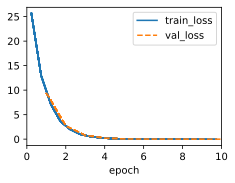

In [44]:
model = LinearRegression(lr=0.01)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

Change the number of epochs(lr=1):

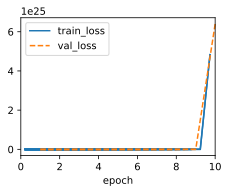

In [45]:
model = LinearRegression(lr=1)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

If the learning rate is too small, the model parameters are updated with a small step. It will take more epochs to reach the optimal solution. If the learning rate is too large, the step is so large that it may lead to a wrong update. With a proper learning rate, the loss fucntion decrease with the increase of epoch numbers until it converges.

5. **How does the solution change as you vary the amount of data generated?**
    1. Plot the estimation error for $\hat{\mathbf{w}} - \mathbf{w}$ and $\hat{b} - b$ as a function of the amount of data. Hint: increase the amount of data logarithmically rather than linearly, i.e., 5, 10, 20, 50, ..., 10,000 rather than 1000, 2000, ..., 10,000.
    2. Why is the suggestion in the hint appropriate?

REF: https://pandalab.me/archives/concise_implementaion_of_lr

Logarithmic Growth Sequence: [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560]


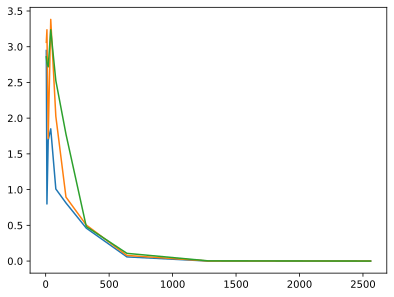

In [48]:
@d2l.add_to_class(LinearRegression)  #@save
def training_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])
    return l

@d2l.add_to_class(LinearRegression)  #@save
def validation_step(self, batch):
    l = self.loss(self(*batch[:-1]), batch[-1])

def stat_bias(n):
    w = torch.tensor([2, -3.4])
    b = torch.tensor([4])
    data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=torch.tensor([4]), num_train=n, num_val=n)
    model = LinearRegression(lr=0.03)
    trainer = d2l.Trainer(max_epochs=3)
    trainer.fit(model, data)
    bias_w = torch.abs(w-model.net.weight).detach().numpy()
    bias_b = torch.abs(b-model.net.bias).detach().numpy().reshape(1, -1)
    return np.concatenate([bias_w, bias_b], axis=1)

initial_value = 5
growth_factor = 2
num_elements = 10
nums = [initial_value * growth_factor**i for i in range(num_elements)]
print("Logarithmic Growth Sequence:", nums)
bias = np.empty((1, 3), dtype=float)
for i in range(len(nums)):
    temp = stat_bias(nums[i])
    bias = np.concatenate([bias, temp], axis=0)
for i in range(3):
    plt.plot(nums[:], bias[1:,i], label=i)
plt.show()

B. It is because the gain of the same amount of data decreases as the total amount of data increases. 